Part 1: Prompt engineering

In [ ]:
!pip install google-generativeai

In [ ]:
#we will be exploring google's python wrapper around their ai API
import os
import google.generativeai as genai

#generate your own key on https://aistudio.google.com/apikey
gemini_api_key = 

genai.configure(api_key=gemini_api_key)
multimodal_model = genai.GenerativeModel("gemini-1.5-flash-002")


In [ ]:
#recall that text prompting and image prompting are both supported
model_response = multimodal_model.generate_content("hi, how was your day?")
model_response.text

In [ ]:
from PIL import Image

img = Image.open("harrypotter.webp")
model_response = multimodal_model.generate_content(["how many male and female actors are in this image? return as list of two numbers: ", img])
model_response.text

In [ ]:
#using your BERT sentiment analysis code from project 3, repeat the process with the uiuc dataset


In [ ]:
#using the Gemini API, write a prompt to generate sentiment analysis on the same dataset

#make sure to includein the prompt a limit to the type of results (positive, negative, neutral)

#compare the sentiment percentages, what do you notice? Does one method overestimate or underestimate the sentiment of the dataset?

#find a few cases where their judgement differs, what do you think is the reason for the discrepancy? And which answer do you find more convincing?

Part 2: images

In [ ]:
#download 10 images from the internet with a feature you're interested in studying. e.g. gender, race, age, action, etc.

#ask the model to annotate the images with the features you're interested in studying

#choose 2 objective (clear right or wrong answer) questions and ask the model to answer them, like how many people are in the image, or what is the color of the object in the image

#choose 2 subjective (open to interpretation) questions and ask the model to answer them, like what is the mood of the person in the image or what race/gender is the person

#look through the responses. Is there anything you disagree with? What do you think is the reason for the discrepancy? Would you trust large scale results generated for this annotation? b

Part 3: Network Demo

In [1]:
!pip install networkx

In [2]:
import networkx as nx

In [5]:
#new graph
G = nx.Graph()

In [ ]:
G.add_node(1)
G.add_nodes_from([2, 3])
#can add additional attributes to the nodes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [ ]:
G.nodes[4]

{'color': 'red'}

In [ ]:
list(G.nodes)

In [11]:
# can manually add edges too
G.add_edge(1, 2)


In [14]:
G.number_of_edges() 

1

In [21]:
#load edges from csv
import pandas as pd

edges = pd.read_csv("got-edges.csv")

G = nx.from_pandas_edgelist(edges, 'Source', 'Target')

In [22]:
G.number_of_edges()

352

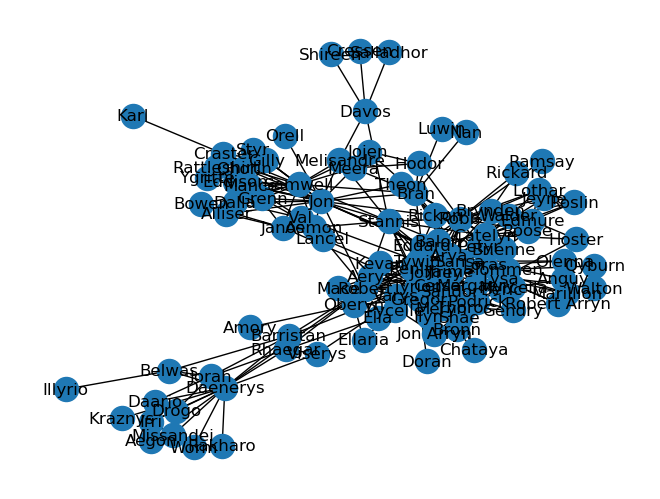

In [24]:
#visualize the graph

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()




In [35]:
#calculate the density of the graph

nx.density(G)


0.062070181625815554

In [25]:
#return highest degree nodes

sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Tyrion', 36),
 ('Jon', 26),
 ('Sansa', 26),
 ('Robb', 25),
 ('Jaime', 24),
 ('Tywin', 22),
 ('Cersei', 20),
 ('Arya', 19),
 ('Robert', 18),
 ('Joffrey', 18),
 ('Catelyn', 18),
 ('Samwell', 15),
 ('Bran', 14),
 ('Stannis', 14),
 ('Daenerys', 14),
 ('Sandor', 13),
 ('Mance', 12),
 ('Gregor', 12),
 ('Eddard', 12),
 ('Lysa', 10),
 ('Loras', 9),
 ('Brynden', 8),
 ('Walder', 8),
 ('Edmure', 8),
 ('Renly', 8),
 ('Oberyn', 7),
 ('Brienne', 7),
 ('Petyr', 7),
 ('Meryn', 7),
 ('Varys', 7),
 ('Margaery', 7),
 ('Beric', 6),
 ('Rickon', 6),
 ('Balon', 6),
 ('Barristan', 6),
 ('Ilyn', 6),
 ('Jorah', 6),
 ('Rhaegar', 6),
 ('Janos', 6),
 ('Kevan', 6),
 ('Aemon', 5),
 ('Thoros', 5),
 ('Meera', 5),
 ('Podrick', 5),
 ('Lothar', 5),
 ('Elia', 5),
 ('Shae', 5),
 ('Craster', 5),
 ('Davos', 5),
 ('Tommen', 5),
 ('Qhorin', 5),
 ('Grenn', 4),
 ('Aerys', 4),
 ('Gendry', 4),
 ('Roose', 4),
 ('Belwas', 4),
 ('Hodor', 4),
 ('Jojen', 4),
 ('Theon', 4),
 ('Bronn', 4),
 ('Roslin', 4),
 ('Pycelle', 4),
 ('Daario', 

In [28]:

#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())





3a. explore this dataframe, are there huge differences between these types of centrality? What might cause this?

In [ ]:
df

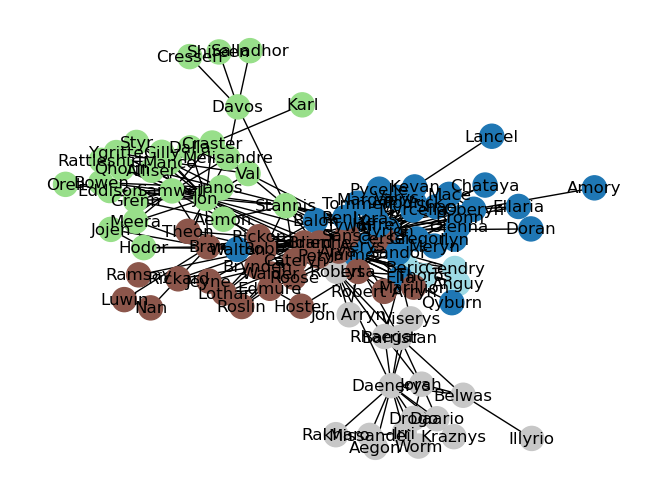

In [40]:
#calculate community structure
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()


Part 4: make your own social network. Take either a short excerpt of a novel, tv show, movie, or real life social network you are familiar with. Make a csv modelled off of the got-edges.csv with a Source, Target, and weight column. You need to decide what constitutes an edge and node, but easiest is characters or people connected by their number of interactions. You should manually type this into the csv. Include at least 25 edges

What kind of potential issues did you run into while converting it into a graph? Any ambiguities that made it difficult to decide? 

use either Gephi or NetworkX to calculate node centrality and community features and add a visualization of the graph here. Does it align with your understanding of the media? 